## Tutorial 01. Understand the SVM code

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, neighbors
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[:, :2] # we only take the first two features.
y = iris.target
feature_names = iris.feature_names[:2]
classes = iris.target_names

In [4]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

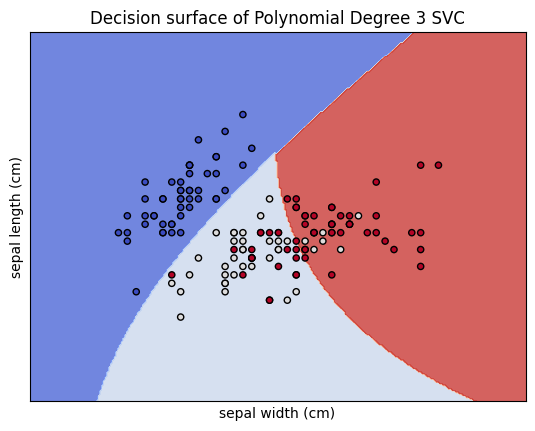

SVM accuracy_score:0.8133333333333334


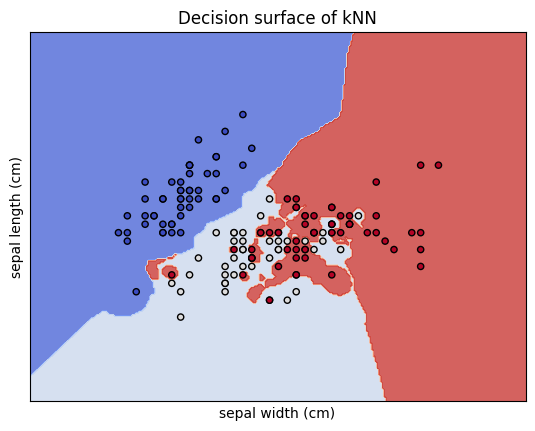

kNN accuracy_score:0.9266666666666666


In [5]:
# The classification SVC model
model = svm.SVC(kernel="poly", degree=3)
clf = model.fit(X, y)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Polynomial Degree 3 SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'SVM accuracy_score:{accuracy_score(y, clf.predict(X))}')
# The classification SVC model
clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_kNN.fit(X, y)
y_pred=clf_kNN.predict(X)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of kNN')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_kNN, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'kNN accuracy_score:{accuracy_score(y, y_pred)}')